# K Nearest Neighbor

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour. A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups.


The target field, called "custcat", has four possible values that correspond to the four customer groups, as follows:

  1- Basic Service

  2- E-Service

  3- Plus Service

  4- Total Service


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
# import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\USER-PC\OneDrive\Data Analytics\Data Science_Machine Learning\Machine Learning (1)\telecust.csv")
df.head()

,Unnamed: 0,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   region      1000 non-null   int64  
 2   tenure      1000 non-null   int64  
 3   age         1000 non-null   int64  
 4   marital     1000 non-null   int64  
 5   address     1000 non-null   int64  
 6   income      1000 non-null   float64
 7   ed          1000 non-null   int64  
 8   employ      1000 non-null   int64  
 9   retire      1000 non-null   float64
 10  gender      1000 non-null   int64  
 11  reside      1000 non-null   int64  
 12  custcat     1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [9]:
# Check how many values does our taget get.

df['custcat'].value_counts()
#print (df['custcat'])

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

 Feature Selection


In [10]:
df.columns

Index(['Unnamed: 0', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [11]:
X = np.asarray(df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']])
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [12]:
y = np.asarray(df['custcat'])
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [13]:
###  Data Standardization

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


Model Building

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# setting k = 4

neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

Predict

In [24]:
ypred = neigh.predict(X_test)
ypred[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [17]:
y_test[0:5]

array([4, 1, 1, 2, 4], dtype=int64)

In [32]:
# Evaluation

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred))

Train set Accuracy:  0.5025
Test set Accuracy:  0.32


In [26]:
#from sklearn.metrics import log_loss
#log_loss(y_test, ypred)

# Result shows that: y_test contain labels for 4 classes, ypred contains prob for only 2 classes


In [29]:
# Calculating the accuracy for different Ks
from sklearn.metrics import accuracy_score


accuracies = []

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    #Calc. accuracy and store 
    accuracies.append(accuracy_score(y_test, ypred))
    
print (accuracies)

[0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32]


Plot model accuracy for Different number of Neighbors

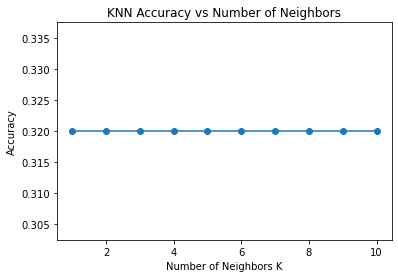

In [30]:
import matplotlib.pyplot as plt

# accuracies list from previous code

# Plot the model accuracy for different k
plt.plot(range(1,11), accuracies, marker='o') 

# Add labels and show plot
plt.title('KNN Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()
